In [1]:
import math

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [12]:
from sympy import *

In [45]:
t, er, ed, delta = symbols('t e_rise e_fall \delta')

In [46]:
print [type(i) for i in [t, er, ed, delta]]

[<class 'sympy.core.symbol.Symbol'>, <class 'sympy.core.symbol.Symbol'>, <class 'sympy.core.symbol.Symbol'>, <class 'sympy.core.symbol.Symbol'>]


In [47]:
E = (sinh(delta + (t/er)) - cosh(delta + (t/er))) - (sinh(delta + (t/ed)) - cosh(delta + (t/ed)))

In [48]:
E_prime = E.diff(t)

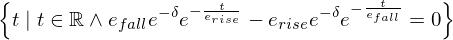

In [49]:
simplify(solveset(E_prime, t))

In [50]:
init_printing()

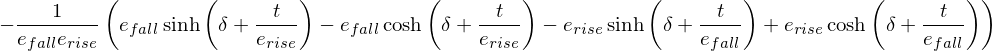

In [53]:
factor(E_prime)

TypeError: 'Add' object does not support indexing